# CV-pytorch实现

## 构建数据集

In [3]:
# import pytorch
import torch
import torch.nn as nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 1.10.0
torchvision version: 0.11.0


In [4]:
train_data = datasets.FashionMNIST(
    root='data', # 设置data下载的文件地址
    train= True,# 获取训练数据
    download= True,# download dataset if it doesn't exist on disk
    transform=ToTensor(),# 转换为模型可以处理的tensor类型
    target_transform=None# 同样也可以转变标签
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [7]:
image,label = train_data[0] # 是一个tuple类型数据
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [9]:
image.shape 
# which means image has only one channel,the height and width of the img are 28
# if channel == 3 ,than this img is a RGB img
# The order of our current tensor is often referred to as `CHW` (Color Channels, Height, Width).

torch.Size([1, 28, 28])

In [10]:
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

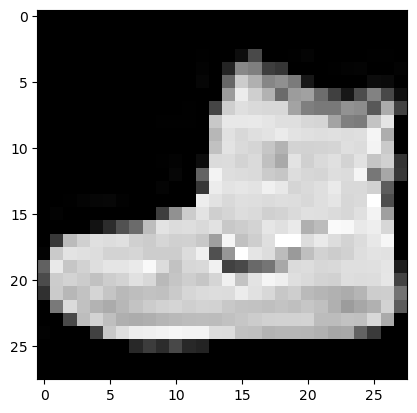

In [13]:
plt.imshow(image.squeeze(),cmap='gray')


## 构建dataloader

In [21]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1024

train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle= True,
                              drop_last=False)


test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)
train_features_batch.shape, train_labels_batch.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

Image size: torch.Size([1, 28, 28])
Label: 2, label size: torch.Size([])


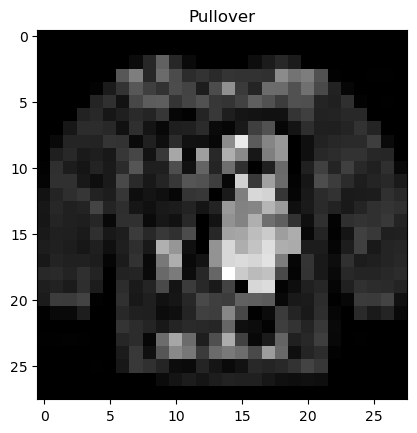

In [26]:
# Show a sample, 查看是否数据保持原样
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_name[label])
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [34]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class BaselineModel(nn.Module):
    def __init__(self, input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.Linear(in_features=hidden_units,out_features=output_shape)
        )
    
    def forward(self,x):
        return self.layer_stack(x)

model_0 = BaselineModel(input_shape=784,hidden_units= 16, output_shape=len(class_name)).to(device)

In [19]:
# set loos_fn, op
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
op = torch.optim.SGD(params=model_0.parameters(),lr = 0.1)

In [38]:
from tqdm.auto import tqdm

torch.manual_seed(42)
epochs = 3 

for epoch in tqdm(range(epochs)):
    print(f'Epoch:{epoch}\n')

    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()

        # 必须要对X，y重新赋值，否则不在一个设备上
        X = X.to(device)
        y = y.to(device)

        y_pred = model_0(X)

        loss = loss_fn(y_pred,y)
        train_loss += loss.item()

        op.zero_grad()

        loss.backward()

        op.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    train_loss /= len(train_dataloader)

    model_0.eval()
    test_loss , test_acc = 0, 0
    with torch.inference_mode():
        for X,y in test_dataloader:
            X = X.to(device)
            y = y.to(device)
            test_pred = model_0(X)

            test_loss += loss_fn(test_pred, y).item()

            test_acc += accuracy_fn(y_true=y, y_pred= test_pred.argmax(dim=1))
        test_loss = test_loss / len(test_dataloader)
        test_acc /= len(test_dataloader)
    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0

Looked at 0/60000 samples
Looked at 25600/60000 samples
Looked at 51200/60000 samples

Train loss: 2.30296 | Test loss: 2.30368, Test acc: 12.85%

Epoch:1

Looked at 0/60000 samples
Looked at 25600/60000 samples
Looked at 51200/60000 samples

Train loss: 2.30301 | Test loss: 2.30368, Test acc: 12.85%

Epoch:2

Looked at 0/60000 samples
Looked at 25600/60000 samples
Looked at 51200/60000 samples

Train loss: 2.30295 | Test loss: 2.30368, Test acc: 12.85%



In [40]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X = X.to(device)
            y = y.to(device)
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'BaselineModel',
 'model_loss': 2.303680896759033,
 'model_acc': 12.848328025477707}

In [49]:
class CNN(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size= 3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(hidden_units,hidden_units,3,padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units,hidden_units,3,padding =1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
    def forward(self,x:torch.Tensor):
        x = self.block1(x)

        x = self.block2(x)

        x = self.classifier(x)

        return x
torch.manual_seed(42)
model_1 = CNN(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_name)).to(device)
model_1

CNN(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [50]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [52]:
torch.manual_seed(42)

# Train and test model 
epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=op,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )


# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=op,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 2.30228 | Train accuracy: 10.00%
Test loss: 2.30232 | Test accuracy: 9.98%

Epoch: 1
---------
Train loss: 2.30229 | Train accuracy: 10.00%
Test loss: 2.30232 | Test accuracy: 9.98%

Epoch: 2
---------
Train loss: 2.30229 | Train accuracy: 10.00%
Test loss: 2.30232 | Test accuracy: 9.98%

Epoch: 3
---------
Train loss: 2.30228 | Train accuracy: 10.00%
Test loss: 2.30232 | Test accuracy: 9.98%

Epoch: 4
---------
Train loss: 2.30228 | Train accuracy: 10.00%
Test loss: 2.30232 | Test accuracy: 9.98%



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 2.30229 | Train accuracy: 10.00%
Test loss: 2.30232 | Test accuracy: 9.98%

Epoch: 1
---------
Train loss: 2.30228 | Train accuracy: 10.00%
Test loss: 2.30232 | Test accuracy: 9.98%

Epoch: 2
---------
Train loss: 2.30229 | Train accuracy: 10.00%
Test loss: 2.30232 | Test accuracy: 9.98%

Epoch: 3
---------
Train loss: 2.30228 | Train accuracy: 10.00%
Test loss: 2.30232 | Test accuracy: 9.98%

Epoch: 4
---------
Train loss: 2.30228 | Train accuracy: 10.00%
Test loss: 2.30232 | Test accuracy: 9.98%

